# Spaceship Titanic 

In [53]:
# imports 
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [54]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
sample_submission = pd.read_csv('../data/sample_submission.csv')

In [55]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [56]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [57]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [58]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [59]:
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [60]:
train_labels = train.pop('Transported')

train = train.drop(['PassengerId', 'Name', 'Destination'], axis=1)
test = test.drop(['PassengerId', 'Name', 'Destination'], axis=1)

In [61]:
cabin_parts = train['Cabin'].str.split('/', expand=True)

train['Deck'] = cabin_parts[0]
train['Num'] = cabin_parts[1].astype(float)
train['Side'] = cabin_parts[2]
train.drop(['Cabin'], axis=1, inplace=True)

test_cabin_parts = test['Cabin'].str.split('/', expand=True)
test['Deck'] = test_cabin_parts[0]
test['Num'] = test_cabin_parts[1].astype(float)
test['Side'] = test_cabin_parts[2]
test.drop(['Cabin'], axis=1, inplace=True)

In [62]:
columns_mode_fill = ['HomePlanet', 'CryoSleep', 'VIP', 'Side', 'Deck']
columns_mean_fill = ['Age']
columns_zero_fill = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num']

mode_values = train[columns_mode_fill].mode().iloc[0]
train[columns_mode_fill] = train[columns_mode_fill].fillna(mode_values)
mean_values = train[columns_mean_fill].mean()
train[columns_mean_fill] = train[columns_mean_fill].fillna(mean_values)
train[columns_zero_fill] = train[columns_zero_fill].fillna(0)

mode_values = test[columns_mode_fill].mode().iloc[0]
test[columns_mode_fill] = test[columns_mode_fill].fillna(mode_values)
mean_values = test[columns_mean_fill].mean()
test[columns_mean_fill] = test[columns_mean_fill].fillna(mean_values)
test[columns_zero_fill] = test[columns_zero_fill].fillna(0)

/var/folders/hx/1433jstd1m15hfgrhj0wx4780000gn/T/ipykernel_90553/501909740.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[columns_mode_fill] = train[columns_mode_fill].fillna(mode_values)
/var/folders/hx/1433jstd1m15hfgrhj0wx4780000gn/T/ipykernel_90553/501909740.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test[columns_mode_fill] = test[columns_mode_fill].fillna(mode_values)


In [63]:
train['MoneySpent'] = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
test['MoneySpent'] = test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

# Insert a new column for age categories
train.insert(3, 'AgeCategories', value=0)
test.insert(3, 'AgeCategories', value=0)

# Define age categories based on age
age_bins = [0, 15, 25, 66, float('inf')]
age_labels = ['first', 'second', 'third', 'fourth']

train['AgeCategories'] = pd.cut(train['Age'], bins=age_bins, labels=age_labels, right=False)
test['AgeCategories'] = pd.cut(test['Age'], bins=age_bins, labels=age_labels, right=False)

In [64]:
test.head()

,HomePlanet,CryoSleep,Age,AgeCategories,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,MoneySpent
0,Earth,True,27.0,third,False,0.0,0.0,0.0,0.0,0.0,G,3.0,S,0.0
1,Earth,False,19.0,second,False,0.0,9.0,0.0,2823.0,0.0,F,4.0,S,2832.0
2,Europa,True,31.0,third,False,0.0,0.0,0.0,0.0,0.0,C,0.0,S,0.0
3,Europa,False,38.0,third,False,0.0,6652.0,0.0,181.0,585.0,C,1.0,S,7418.0
4,Earth,False,20.0,second,False,10.0,0.0,635.0,0.0,0.0,F,5.0,S,645.0


In [65]:
# label encoder
train = pd.concat([train, pd.get_dummies(train[['Deck', 'Side', 'HomePlanet']])], axis=1)
train = pd.concat([train, pd.get_dummies(train['AgeCategories'])], axis=1)


train[['CryoSleep', 'VIP','Deck_T', 'Side_P', 'Side_S', 'HomePlanet_Earth','HomePlanet_Europa','HomePlanet_Mars', 'first', 'second', 'third', 'fourth']] = train[['CryoSleep', 'VIP','Deck_T', 'Side_P', 'Side_S', 'HomePlanet_Earth','HomePlanet_Europa','HomePlanet_Mars', 'first', 'second', 'third', 'fourth']].apply(LabelEncoder().fit_transform)


train = train.drop(['Deck', 'Side', 'HomePlanet', 'AgeCategories'], axis=1)
train_labels = LabelEncoder().fit_transform(train_labels)

In [66]:
test = pd.concat([test, pd.get_dummies(test[['Deck', 'Side', 'HomePlanet']])], axis=1)
test = pd.concat([test, pd.get_dummies(test['AgeCategories'])], axis=1)
test[['CryoSleep', 'VIP','Deck_T', 'Side_P', 'Side_S', 'HomePlanet_Earth','HomePlanet_Europa','HomePlanet_Mars', 'first', 'second', 'third', 'fourth']] = test[['CryoSleep', 'VIP','Deck_T', 'Side_P', 'Side_S', 'HomePlanet_Earth','HomePlanet_Europa','HomePlanet_Mars', 'first', 'second', 'third', 'fourth']].apply(LabelEncoder().fit_transform)
test = test.drop(['Deck', 'Side', 'HomePlanet', 'AgeCategories'], axis=1)

In [67]:
train_labels

array([0, 1, 0, ..., 1, 0, 1])

In [68]:
scaler = StandardScaler()

float_columns = train.select_dtypes(include=['float64']).columns
train[float_columns] = scaler.fit_transform(train[float_columns])

float_columns_test = test.select_dtypes(include=['float64']).columns
test[float_columns_test] = scaler.transform(test[float_columns_test])

In [69]:
train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,MoneySpent,...,Deck_T,Side_P,Side_S,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,first,second,third,fourth
0,0,0.709437,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,-1.141624,-0.514066,...,0,1,0,0,1,0,0,0,1,0
1,0,-0.336717,0,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,-1.141624,-0.251479,...,0,0,1,1,0,0,0,1,0,0
2,0,2.034566,1,-0.268001,1.959998,-0.283579,5.695623,-0.219796,-1.141624,3.190333,...,0,0,1,0,1,0,0,0,1,0
3,0,0.290975,0,-0.333105,0.523010,0.336851,2.687176,-0.092818,-1.141624,1.332604,...,0,0,1,0,1,0,0,0,1,0
4,0,-0.894666,0,0.125652,-0.237159,-0.031059,0.231374,-0.261240,-1.139678,-0.124824,...,0,0,1,1,0,0,0,1,0,0


In [70]:
x_train, x_validation, y_train, y_validation = train_test_split(train, train_labels, test_size=0.2, random_state=42)

In [71]:
x_validation.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,MoneySpent,...,Deck_T,Side_P,Side_S,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,first,second,third,fourth
304,0,-0.685435,0,0.298253,-0.062314,0.776670,-0.267960,0.669045,-1.019020,0.363602,...,0,0,1,0,0,1,0,1,0,0
2697,0,-0.755179,0,-0.327048,0.285496,-0.283579,-0.270626,-0.262122,-0.246422,-0.189757,...,0,0,1,1,0,0,0,1,0,0
8424,1,0.848924,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,1.678262,-0.514066,...,0,0,1,1,0,0,0,0,1,0
1672,0,0.430462,0,-0.333105,-0.069207,0.445552,-0.270626,-0.263003,-0.575311,-0.237921,...,0,1,0,1,0,0,0,0,1,0
8458,1,0.988411,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,-0.581150,-0.514066,...,0,1,0,0,1,0,0,0,1,0


In [72]:
class MyDataset(Dataset):

    def __init__(self, x, y):
        self.data = torch.from_numpy(np.array(x, dtype=np.float32))
        self.labels = torch.from_numpy(np.array(y, dtype=np.int64))
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        return self.data[index], self.labels[index]
    
batch_size = 64
train_dataloader = DataLoader(MyDataset(x_train, y_train), batch_size=batch_size, shuffle=True)

val_dataloader = DataLoader(MyDataset(x_validation, y_validation), batch_size=batch_size, shuffle=True)

In [73]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden_size, 1))
    
    def forward(self, x):
        return self.model(x)

input_size = x_train.shape[1]
hidden_size = input_size * 2
model = NeuralNetwork(input_size, hidden_size)
model

NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=27, out_features=54, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=54, out_features=1, bias=True)
  )
)

In [74]:
EPOCHS = 200
LR = 0.004

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
device = 'cpu'

In [75]:
# Store the training and validation metrics
train_loss_count, validation_loss_count = [], []

def accuracy_step(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    return (correct / len(y_pred)) * 100


def train_step(model, data_loader, loss_fn, optimizer, device):
    train_loss, train_acc = 0, 0
    model.train()
    for x, y in data_loader:
        optimizer.zero_grad()
        x, y = x.to(device).float(), y.to(device).float().unsqueeze(1)
        output = model(x)
        loss = loss_fn(output, y)
        train_loss += loss.item()
        train_acc += accuracy_step(y_true=y, y_pred=torch.round(torch.sigmoid(output)))
        loss.backward()
        optimizer.step()
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    train_loss_count.append(train_loss)
    print(f'Epoch {epoch + 1}/{EPOCHS}, Train loss: {train_loss:.5f}, Train accuracy: {train_acc:.2f}%')


def validation_step(model, data_loader, loss_fn, device):
    val_loss, val_acc = 0, 0
    model.eval()
    with torch.no_grad():
        for x_val, y_val in data_loader:
            x_val, y_val = x_val.to(device).float(), y_val.to(device).float().unsqueeze(1)
            pred = model(x_val)
            loss = loss_fn(pred, y_val)
            val_loss += loss.item()
            val_acc += accuracy_step(y_true=y_val, y_pred=torch.round(torch.sigmoid(pred)))
        val_loss /= len(data_loader)
        val_acc /= len(data_loader)
        validation_loss_count.append(val_loss)
        print(f'Epoch {epoch + 1}/{EPOCHS}, Validation loss: {val_loss:.5f}, Validation accuracy: {val_acc:.2f}%')

# Training and Validation Loops
for epoch in range(EPOCHS):
    print(f'\nEpoch: {epoch + 1}\n{"-" * 10}')
    train_step(model, train_dataloader, loss_fn, optimizer, device)
    validation_step(model, val_dataloader, loss_fn, device)



Epoch: 1
----------
Epoch 1/200, Train loss: 0.52284, Train accuracy: 73.58%
Epoch 1/200, Validation loss: 0.43037, Validation accuracy: 78.91%

Epoch: 2
----------
Epoch 2/200, Train loss: 0.43791, Train accuracy: 79.14%
Epoch 2/200, Validation loss: 0.43027, Validation accuracy: 78.00%

Epoch: 3
----------


Epoch 3/200, Train loss: 0.42997, Train accuracy: 79.44%
Epoch 3/200, Validation loss: 0.42372, Validation accuracy: 78.87%

Epoch: 4
----------
Epoch 4/200, Train loss: 0.41977, Train accuracy: 79.96%
Epoch 4/200, Validation loss: 0.41873, Validation accuracy: 79.09%

Epoch: 5
----------
Epoch 5/200, Train loss: 0.41909, Train accuracy: 79.99%
Epoch 5/200, Validation loss: 0.42117, Validation accuracy: 78.00%

Epoch: 6
----------
Epoch 6/200, Train loss: 0.41717, Train accuracy: 80.09%
Epoch 6/200, Validation loss: 0.41520, Validation accuracy: 78.26%

Epoch: 7
----------
Epoch 7/200, Train loss: 0.41517, Train accuracy: 80.09%
Epoch 7/200, Validation loss: 0.41109, Validation accuracy: 79.92%

Epoch: 8
----------
Epoch 8/200, Train loss: 0.41545, Train accuracy: 79.63%
Epoch 8/200, Validation loss: 0.42094, Validation accuracy: 78.32%

Epoch: 9
----------
Epoch 9/200, Train loss: 0.41155, Train accuracy: 80.42%
Epoch 9/200, Validation loss: 0.42102, Validation accuracy: 79.26%

Epoch

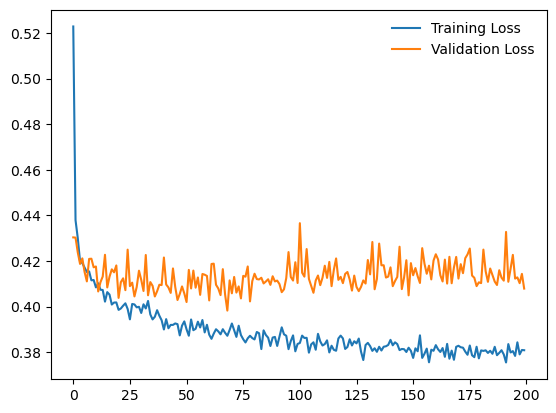

In [76]:

plt.plot(train_loss_count, label='Training Loss')
plt.plot(validation_loss_count, label='Validation Loss')
plt.legend(frameon=False)

In [78]:
tensor_data = torch.tensor(np.array(test, dtype=np.float32), device=device)
predictions = torch.sigmoid(model(tensor_data)).round()
boolean_predictions = predictions.view(-1).bool().cpu().numpy()
submission_df = pd.DataFrame({
    "PassengerId": sample_submission["PassengerId"], 
    "Transported": boolean_predictions
})
submission_df.to_csv("submission.csv", index=False)